In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('D:/memory_img/phone_img/IMG_20200831_193405.jpg')
img = cv2.resize(img, (200, 200))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
class Conv2d:
    def __init__(self, input, numOfKernel, kernelSize, padding=1, stride=1):
        self.input = np.pad(input, ((padding, padding), (padding, padding)), 'constant')
        self.stride = stride
        self.kernel = np.random.randn(numOfKernel, kernelSize, kernelSize)

        self.results = np.zeros((int((self.input.shape[0] - self.kernel.shape[1])/self.stride) + 1, 
                                int((self.input.shape[1] - self.kernel.shape[2])/self.stride) + 1,
                                self.kernel.shape[0]))

    def getROI(self):
        for row in range(int((self.input.shape[0] - self.kernel.shape[1])/self.stride) + 1):
            for col in range(self.input.shape[1] - self.kernel.shape[1] + 1):
                roi = self.input[row*self.stride: row*self.stride + self.kernel.shape[1],
                                col*self.stride: col*self.stride + self.kernel.shape[2]]
                
                yield row, col, roi
                
    def operate(self):
        for layer in range(self.kernel.shape[0]):
            for row, col, roi in self.getROI():
                self.results[row, col, layer] = np.sum(roi * self.kernel[layer])
    
        return self.results

In [5]:
class Conv3d:
    def __init__(self, input, numOfKernel, kernelSize, padding=1, stride=1):
        # Padding the input (3D: depth, height, width)
        self.input = np.pad(input, ((padding, padding), (padding, padding), (padding, padding)), 'constant')
        self.stride = stride
        # Randomly initialize kernels (numOfKernels, kernelDepth, kernelHeight, kernelWidth)
        self.kernel = np.random.randn(numOfKernel, kernelSize, kernelSize, kernelSize)

        # Output dimensions calculation (after convolution)
        self.results = np.zeros((
            int((self.input.shape[0] - self.kernel.shape[1]) / self.stride) + 1,  # depth
            int((self.input.shape[1] - self.kernel.shape[2]) / self.stride) + 1,  # height
            int((self.input.shape[2] - self.kernel.shape[3]) / self.stride) + 1,  # width
            self.kernel.shape[0]  # number of kernels
        ))

    def getROI(self):
        # Generator for Region of Interest (ROI) in 3D
        for depth in range(int((self.input.shape[0] - self.kernel.shape[1]) / self.stride) + 1):
            for row in range(int((self.input.shape[1] - self.kernel.shape[2]) / self.stride) + 1):
                for col in range(int((self.input.shape[2] - self.kernel.shape[3]) / self.stride) + 1):
                    roi = self.input[
                        depth * self.stride: depth * self.stride + self.kernel.shape[1],  # depth
                        row * self.stride: row * self.stride + self.kernel.shape[2],      # height
                        col * self.stride: col * self.stride + self.kernel.shape[3]       # width
                    ]
                    yield depth, row, col, roi

    def operate(self):
        # Perform convolution operation for each kernel
        for layer in range(self.kernel.shape[0]):  # numOfKernels
            for depth, row, col, roi in self.getROI():
                # Compute the convolution (dot product between the kernel and the region of interest)
                self.results[depth, row, col, layer] = np.sum(roi * self.kernel[layer])
    
        return self.results

In [6]:
class MaxPooling:
    def __init__(self, input, poolingSize=2):
        self.input = input
        self.poolingSize = poolingSize
        self.result = np.zeros(int(self.input.shape[0]/self.poolingSize),
                               int(self.input.shape[0]/self.poolingSize),
                               self.input.shape[2])

    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(int(self.input.shape[0]/self.poolingSize)):
                for col in range(int(self.input.shape[1]/self.poolingSize)):
                    self.result[row, col, layer] = np.max(self.input[row*self.poolingSize: row*self.poolingSize + self.poolingSize,
                                                            col*self.poolingSize: col*self.poolingSize + self.poolingSize,
                                                            layer])

        return sself.result

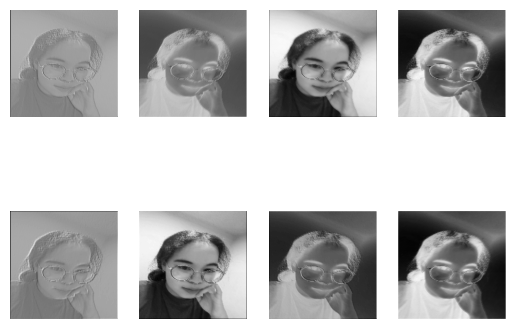

In [7]:
img_gray_conv2d = Conv2d(img_gray, 8, 3).operate()

for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(img_gray_conv2d[:,:,i], cmap='gray')
    plt.axis('off')

plt.show()